* ## **Import tools and primary data**

In [1]:
import pandas as pd
df1 = pd.read_csv("usagers.csv")
df2 = pd.read_csv("vehicules.csv")
df3 = pd.read_csv("caract.csv")
df4 = pd.read_csv("lieux.csv")

* ## **Merge original data**

In [2]:
data = df1.merge(df2, on = ['id_vehicule', 'Num_Acc', 'num_veh'])
data = data.merge(df3, on = 'Num_Acc')
data = data.merge(df4, on = 'Num_Acc')
data.columns

Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp',
       'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc',
       'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm',
       'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv',
       'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf',
       'infra', 'situ', 'vma'],
      dtype='object')

* ## **Missing values handling**

+ ### Dropping variables

In [3]:
# count nan values
nan_values = data.isna().sum()
# percentage of nan values ay column
nan_values = nan_values.sort_values(ascending=False) *100 / data.shape[0]
# columns with nan values greater than 20%
nan_values = nan_values.loc[nan_values > 20]
nan_values

long       100.000000
lartpc      99.648811
larrout     99.375080
occutc      98.587726
v2          92.673921
dtype: float64

In [4]:
# Copy of original data
df = data.copy()
# Drop nan_values criteria columns
df = df.drop(nan_values.to_dict().keys(), axis=1)
# Drop other column not concerned or not making sens in the process
df = df.drop(['lat','secu1', 'secu2', 'secu3'], axis=1)
df.columns, df.shape

(Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe',
        'an_nais', 'trajet', 'locp', 'actp', 'etatp', 'senc', 'catv', 'obs',
        'obsm', 'choc', 'manv', 'motor', 'jour', 'mois', 'an', 'hrmn', 'lum',
        'dep', 'com', 'agg', 'int', 'atm', 'col', 'adr', 'catr', 'voie', 'v1',
        'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'surf', 'infra',
        'situ', 'vma'],
       dtype='object'),
 (132977, 45))

In [5]:
#  df.rename(columns={'catu': 'cat_usagers', 
#                     'grav': 'gravite',
#                     'obs' : 'obs_fixe',
#                     'obsm' : 'obs_mobile'
                    
#                     }, 
#            inplace=True)

* ### Dropping rows

In [6]:
# Drop rows with any cells with nan values
df = df.dropna(axis=0, how='any')
df.shape

(104994, 45)

===============================================================================

In [7]:
# convert sexe as categorical
# df.sexe = df.sexe.astype('category')
# df.sexe.dtypes

In [8]:
# variance 
df.var().sort_values().head()

an      5.169928e-26
v1      2.015286e-02
agg     2.138907e-01
sexe    2.175298e-01
prof    2.859882e-01
dtype: float64

In [9]:
# dropping `an` variable
df = df.drop('an', axis=1)

In [10]:
# Find the high correlated variables (> 60% in our case)
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=True)
so1 = so[so > .6]
print(so1[so1 != 1])

catu   locp     0.672248
locp   catu     0.672248
vma    agg      0.684503
agg    vma      0.684503
place  locp     0.761188
locp   place    0.761188
catu   etatp    0.783430
etatp  catu     0.783430
locp   etatp    0.790989
etatp  locp     0.790989
place  etatp    0.882175
etatp  place    0.882175
place  catu     0.909641
catu   place    0.909641
dtype: float64


In [11]:
# Dropping the high correlated varialbles, priority to these with less categories
df = df.drop(['locp', 'vma', 'etatp', 'place'], axis=1)

In [12]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so[so !=1]

catr   agg     0.591247
agg    catr    0.591247
col    obsm    0.475824
obsm   col     0.475824
agg    pr1     0.440565
                 ...   
motor  atm     0.000110
senc   grav    0.000060
grav   senc    0.000060
mois   senc    0.000023
senc   mois    0.000023
Length: 992, dtype: float64

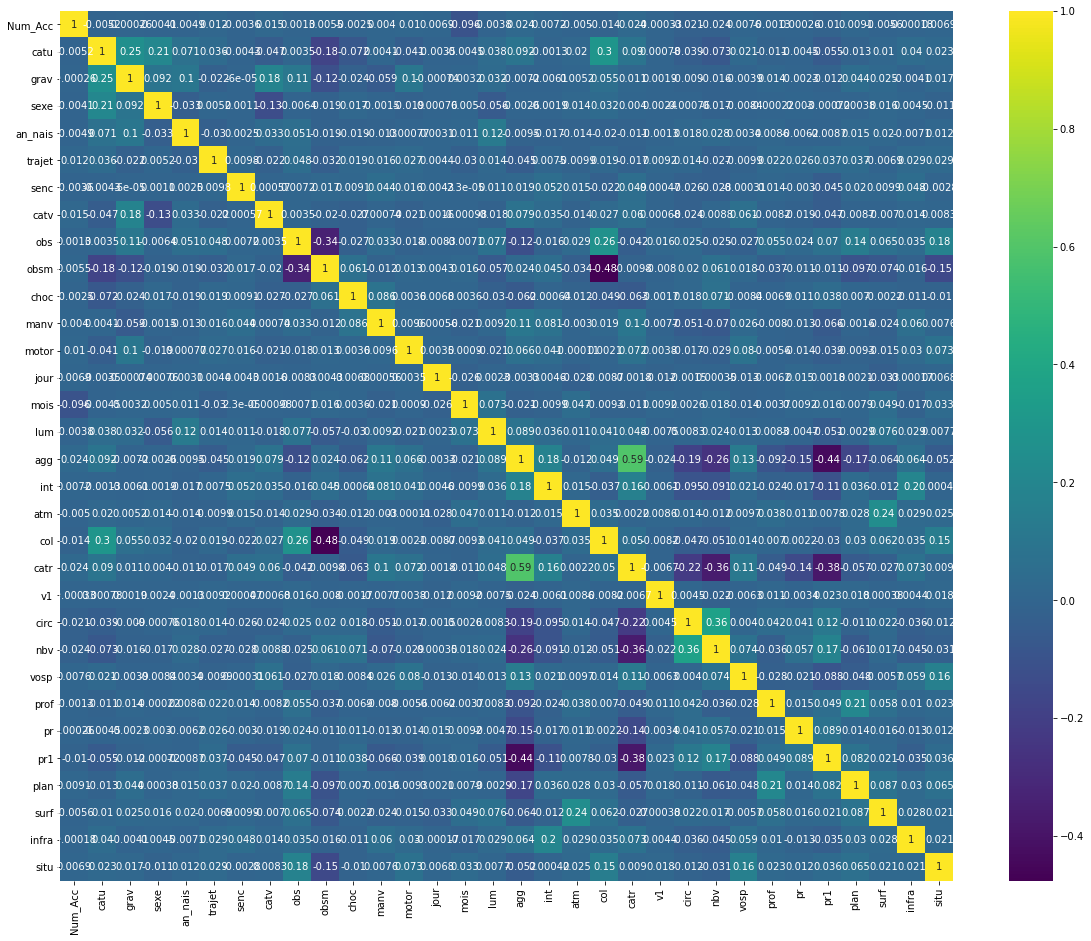

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

# gestion des modalites 

### - variables conversion in cat type

In [39]:
cat = ['lum', 'agg', 'int', 'atm', 'col',
        'catr', 'circ', 'vosp', 'prof', 
       'plan', 'surf', 'infra', 'situ', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 
       'catu', 'sexe', 'trajet', 'actp']

df1 = df.copy()

df1[cat] = df1[cat].astype('category')

df1.select_dtypes(exclude=['category']).columns

drop = ['an_nais', 'motor', 
      'jour', 'mois', 'hrmn', 'dep', 
      'com', 'adr', 'voie', 'v1',
      'nbv', 'pr', 'pr1',
      'Num_Acc', 'id_vehicule', 'num_veh']

df1 = df1.drop(drop, axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104994 entries, 0 to 132976
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   catu    104994 non-null  category
 1   grav    104994 non-null  int64   
 2   sexe    104994 non-null  category
 3   trajet  104994 non-null  category
 4   actp    104994 non-null  category
 5   senc    104994 non-null  category
 6   catv    104994 non-null  category
 7   obs     104994 non-null  category
 8   obsm    104994 non-null  category
 9   choc    104994 non-null  category
 10  manv    104994 non-null  category
 11  lum     104994 non-null  category
 12  agg     104994 non-null  category
 13  int     104994 non-null  category
 14  atm     104994 non-null  category
 15  col     104994 non-null  category
 16  catr    104994 non-null  category
 17  circ    104994 non-null  category
 18  vosp    104994 non-null  category
 19  prof    104994 non-null  category
 20  plan    104994 non-null  c

### - Reduction of categories in some variables

In [40]:
# on remplace ces observations par la modalite 9 = AUTRE
df1.trajet.loc[(df1.trajet == -1) | (df1.trajet == 0)] = 9

# action du pieton
df1.actp.loc[(df1.actp == '-1') | (df1.actp == '0') | (df1.actp == 'A') | (df1.actp == 'B')] = '9'

# obstacle de mobilite
df1.obsm.loc[(df1.obsm == -1) | (df1.obsm == 0)] = 9

# sens de la circulation
df1.circ.loc[df1.circ == -1] = 1

### - Sampling problem handling (Improper balance of the data)

In [41]:
df1.grav.value_counts()

4    45516
1    44777
3    12751
2     1950
Name: grav, dtype: int64

Given that we have : 
    <li>1 - Indemne </li>
    <li>2 - Tué</li>
    <li>3 - Blessé hospitalisé</li>
    <li>4 - Blessé léger</li>

We are going to merge the categories `2` and `3` and  considered these observations as people who need `serious and urgent medical attention` or `dead`.


In [43]:
df1.grav.replace(2, 3, inplace=True)
df1.grav.value_counts(normalize = True)

4    0.433510
1    0.426472
3    0.140018
Name: grav, dtype: float64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [44]:
y = df1.grav
X = df1.drop(columns='grav')

In [45]:
df1.grav.unique()

array([4, 1, 3], dtype=int64)

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [47]:
# hot encoding of the features
X_data = pd.get_dummies(X.astype(str))

# Normalizing the data
X_N_data = normalize(X_data.values)

# Splitting the data for training and test purpose
X_train, X_test, y_train, y_test = train_test_split(X_N_data, y, random_state=42)


#### Model selection, trainning and predictions

In [48]:
# Default Random forest
model_rf = RandomForestClassifier(random_state=42)

# fitting 
model_rf.fit(X_train, y_train)

# Predictions (test)
predictions_test = model_rf.predict(X_test)

# Predictions (train)
predictions_train = model_rf.predict(X_train)


In [49]:
# Accuracy Metric
train_acc = accuracy_score(y_train, predictions_train)
print('Trainning accuracy : {:04.2f}'.format(train_acc)),

test_acc = accuracy_score(y_test, predictions_test)
print('Test accuracy  : {:04.2f}'.format(test_acc))

Trainning accuracy : 0.98
Test accuracy  : 0.70


                 precision    recall  f1-score   support

        Indemne      0.750     0.808     0.778     11304
Tué/hospitalisé      0.556     0.323     0.409      3588
   Blessé léger      0.668     0.705     0.686     11357

       accuracy                          0.697     26249
      macro avg      0.658     0.612     0.624     26249
   weighted avg      0.688     0.697     0.688     26249



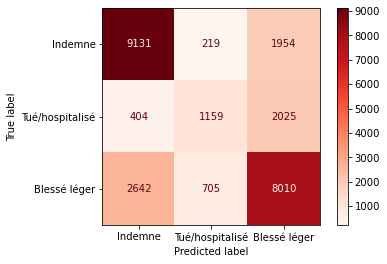

In [50]:
from sklearn.metrics import plot_confusion_matrix, classification_report
labels_disp = ["Indemne", "Tué/hospitalisé", "Blessé léger"]
print(classification_report(y_test, predictions_test, digits=3, zero_division = 1, target_names = labels_disp)),
disp = plot_confusion_matrix(model_rf, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d',
                             display_labels=labels_disp)

#### Hyperarameters tuning for Random Forest using GridSearchCV

In [51]:
from pprint import pprint

# Look at parameters used by our current base forest
print('Parameters currently in use :\n')
pprint(model_rf.get_params())

Parameters currently in use :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [52]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 'None'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_rf, 
                           param_grid = param_grid,
                           cv = 3)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [20]:
# On redécoupe la base en train/test

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_N_data, y)


# On crée le modèle :

model_boosting = GradientBoostingClassifier(loss="deviance",
    learning_rate=0.2,
    max_depth=5,
    max_features="sqrt",
    subsample=0.95,
    n_estimators=200)


model_boosting.fit(X_train_xgb, y_train_xgb)

# On calcul les prédictions
predictions_test_xgb = model_boosting.predict(X_test_xgb)
predictions_train_xgb = model_boosting.predict(X_train_xgb)

# On affiche les résultats :

train_acc = accuracy_score(y_train_xgb, predictions_train_xgb)
print(train_acc)

test_acc = accuracy_score(y_test_xgb, predictions_test_xgb)
print(test_acc)

0.7266112134103753
0.6895881747876109


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_xgb, predictions_test_xgb))
print(classification_report(y_test_xgb, predictions_test_xgb))

[[9258   15  163 1812]
 [  48   29  176  199]
 [ 361   70  755 2076]
 [2723   46  459 8059]]
              precision    recall  f1-score   support

           1       0.75      0.82      0.78     11248
           2       0.18      0.06      0.09       452
           3       0.49      0.23      0.31      3262
           4       0.66      0.71      0.69     11287

    accuracy                           0.69     26249
   macro avg       0.52      0.46      0.47     26249
weighted avg       0.67      0.69      0.67     26249



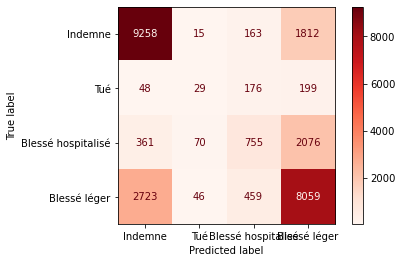

In [35]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model_boosting, X_test_xgb, y_test_xgb, 
                             cmap='Reds', values_format='d', 
                             display_labels=["Indemne", "Tué", "Blessé hospitalisé", "Blessé léger"])

# Questions
## 1. Comment les modalites avec les petites representations vont affecter le modele?
## 2. Quels sont les algos de classifications qu'on peut encore essayer pour ameliorer?
## 3. Prisen en comptes des suggestions se l'article, comment s'y prendre? (https://larevueia.fr/xgboost-vs-random-forest-predire-la-gravite-dun-accident-de-la-route/)
## 4. Suggestions?

### Créer notre SVM dans sklearn en créant un objet SVC (support vector classificator).

In [33]:
##### Création de notre modèle SVM

In [33]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = \
    train_test_split(X_N_data, y,
                     test_size=0.2)

In [33]:
print(len(X_train_SVM),' samples in training data\n',
      len(X_test_SVM),' samples in test data\n', )

83995  samples in training data
 20999  samples in test data



In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', gamma="" random_state = 0) # kernel linéaire
classifier.fit(X_train_SVM, y_train_SVM)

SVC(kernel='linear', random_state=0)

# Faire la prédiction

In [35]:
y_pred1 = classifier.predict(X_test_SVM)

In [ ]:
# Evaluer le modèle

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_SVM, y_pred1))
print(classification_report(y_test_SVM, y_pred1))

[[7276    0    7 1646]
 [  64    0    8  321]
 [ 423    0   40 2108]
 [2620    0   25 6461]]
              precision    recall  f1-score   support

           1       0.70      0.81      0.75      8929
           2       0.00      0.00      0.00       393
           3       0.50      0.02      0.03      2571
           4       0.61      0.71      0.66      9106

    accuracy                           0.66     20999
   macro avg       0.45      0.38      0.36     20999
weighted avg       0.63      0.66      0.61     20999



C:\Users\cleme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


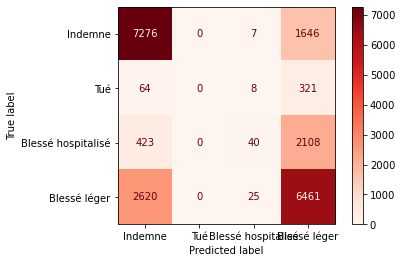

In [38]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test_SVM, y_test_SVM, 
                             cmap='Reds', values_format='d', 
                             display_labels=["Indemne", "Tué", "Blessé hospitalisé", "Blessé léger"])

# Imporper balanced data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/